# Sound Classification Model with YAMNet (Transfer Learning)

In [1]:
# install
!pip install tensorflow tensorflow_hub tensorflow_io librosa

In [2]:
# imports
import csv
import requests
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_io as tfio
import librosa
import librosa.display
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.11/dist-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/usr/local/lib/python3.11/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/usr/local/lib/python3.11/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl8str_util8EndsWithESt17basic_string_viewIcSt11char_traitsIcEES4_']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/usr/local/lib/python3.11/dist-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/usr/local/lib/python3.11/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/usr/local/lib/python3.11/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZN3tsl8str_util9LowercaseB5cxx11ESt17basic_s

In [3]:
# load YAMNet model
yamnet_model_handle = "https://tfhub.dev/google/yamnet/1"
yamnet_model = hub.load(yamnet_model_handle)

In [4]:
# load class names for YAMNet
def load_class_map(url):
    response = requests.get(url)
    lines = response.text.splitlines()
    class_names = list(csv.reader(lines))[0:]
    return [name[0] for name in class_names]

In [5]:
class_map_url = "https://raw.githubusercontent.com/tensorflow/models/master/research/audioset/yamnet/yamnet_class_map.csv"
class_names = load_class_map(class_map_url)

In [6]:
# generate audio signal (sine wave)
sample_rate = 16000
duration = 1.0
frequency = 440.0

t = np.linspace(0, duration, int(sample_rate * duration), False)
audio_sample = 0.5 * np.sin(2 * np.pi * frequency * t).astype(np.float32)

In [7]:
# run YAMNet model
waveform = tf.convert_to_tensor(audio_sample, dtype=tf.float32)
scores, embeddings, spectrogram = yamnet_model(waveform)

In [8]:
# average scores over time and find top class
mean_scores = tf.reduce_mean(scores, axis=0)
top_class_index = tf.argmax(mean_scores)
predicted_class = class_names[top_class_index.numpy()]

In [9]:
# display results
print("Predicted Class:", predicted_class)

Predicted Class: 382


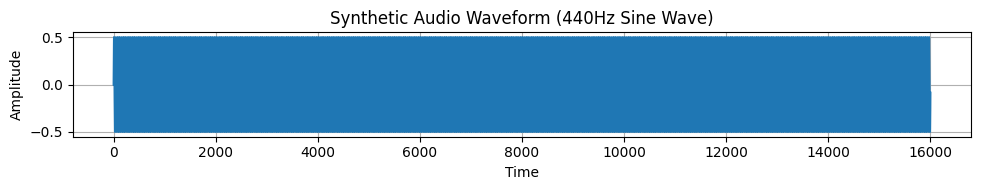

In [10]:
# plot waveform
plt.figure(figsize=(10, 2))
plt.plot(audio_sample)
plt.title("Synthetic Audio Waveform (440Hz Sine Wave)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()